<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Chest_Xray_Classification_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHEST XRAY CLASSIFICATION



# 1. SETTINGS

## GPU

Before starting, we ensure access to the GPU and that there are no possible access failures.

To set up the execution environment in Google Colab, follow these steps:

1. Open your Google Colab notebook.
2. Go to the top menu and select "Runtime".
3. Choose the option "Change Runtime Type".
4. A pop-up window will appear where you can choose the type of runtime environment you want. Common options include "Python 3" and "Python 3 with GPU". Select the option that suits your needs.
5. If you choose a GPU-enabled configuration, Google Colab may prompt you to authenticate to access additional resources. Follow the on-screen instructions to authenticate if necessary.
6. After selecting the desired configuration, click on "Save".

Once you have set up the execution environment, you will be able to run your code in Google Colab using the resources of the selected environment. **Remember that the availability of GPU in Google Colab may be subject to limitations and temporary restrictions, especially if you are using the free option**.


Menu (spanish):

`Conectar --- Cambiar tipo de entorno de ejecución
 --- T4GPU`


The command `!nvidia-smi` displays information about the GPU allocated to your Colab session. When you run this command in a code cell, you'll see output providing details about the GPU, such as its name, memory usage, temperature, driver version, among others.

This command allows Google Colab users to check what kind of GPU they have been allocated and get relevant information about its status and resources. It's particularly useful when working with GPU-intensive tasks to ensure the GPU is functioning properly and to monitor its usage.

In [ ]:
!nvidia-smi

Mon Apr  8 17:28:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Verifying that we are using an NVIDIA driver and CUDA.

CUDA stands for "Compute Unified Device Architecture." It is a parallel computing platform developed by NVIDIA that enables utilizing the processing power of graphics cards (GPUs) for general-purpose computing tasks, in addition to their traditional graphics and visualization-related tasks.

GPUs, originally designed for handling graphics and rendering, possess a large number of processing cores capable of performing simultaneous calculations at high speed. CUDA provides a programming environment and an Application Programming Interface (API) that allows developers to write code that runs on the GPU instead of the CPU, which can significantly accelerate certain computational tasks.

CUDA is used in a variety of applications and fields, including simulation, machine learning, scientific research, 3D visualization, image and video processing, and more. Numerous popular libraries and frameworks, such as TensorFlow and PyTorch, have support for CUDA, enabling developers to harness the power of GPUs to accelerate their applications and algorithms.

In summary, CUDA is a technology developed by NVIDIA that enables leveraging the processing capability of GPUs for general-purpose tasks, which has had a significant impact on fields requiring intensive computations and parallelization.


## Setting: `/content` and `/content/datasets`

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'dataset' directory, so all datasets are easily accessible for any project.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## INSTALLING PACKAGES WITH `!PIP`

We install the necessary Python packages (if they are not already installed, by default). The output is cleared at the end to avoid flooding the cell output; we only leave the checking of Ultralytics' "home" for YOLOv8.

In [ ]:
# Pip install method (recommended)

!pip install --upgrade pip
!pip install torch torchvision torchaudio
!pip install roboflow
!pip install ultralytics

# clear installation output from  !pip
from IPython import display
display.clear_output()

# check package y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


We load YOLOv8 and prepare image visualization within the notebook. This way, it's not necessary to use matplotlib, and everything is more direct. YOLOv8 (in its training, validation, and inference) saves partial results in PNG and CSV format.

In [ ]:
from ultralytics import YOLO

# [DATASET PARA CLASIFICACIÓN](https://docs.ultralytics.com/datasets/classify/)

Creamos el directorio datasets (si no existe), en él vamos a guardar el dataset
con el cual voy a entrenar yolov8.

In [ ]:
import os
# MYDRIVE = os.path.join(HOME, "drive/MyDrive") #lento
# Crear el directorio si no existe
#datasets_dir = os.path.join(MYDRIVE, "datasets") # lento
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


Para crear un archivo ZIP de un conjunto de datos para exportarlo desde el SDK de Python, utiliza el método 'project.export()'. Para descargar el archivo ZIP, utiliza el método 'project.download()'.

```
version.download(model_format="yolov5", location="./downloads")

```

**[Roboflow](https://roboflow.com/)** es una plataforma que permite gestionar conjuntos de datos para tareas de visión por computadora, y ofrece herramientas para etiquetar, transformar y descargar conjuntos de datos. Si deseas descargar un conjunto de datos desde Roboflow, puedes utilizar un snippet de código proporcionado por la plataforma. Aquí hay un ejemplo de cómo funciona un snippet típico de Roboflow para descargar un conjunto de datos:

1. En Roboflow, selecciona el conjunto de datos que deseas descargar o configurar para su descarga.

2. Busca la opción de "Export" o "Download" en la interfaz de usuario de Roboflow.

3. Roboflow generará un código snippet que puedes copiar y pegar en tu entorno de desarrollo, generalmente en Python.

4. Asegúrate de que tengas instaladas las bibliotecas o dependencias necesarias en tu entorno para ejecutar el código snippet.

5. Ejecuta el código snippet en tu entorno. El código suele incluir instrucciones para descargar el conjunto de datos y, a menudo, se proporciona en forma de URL o mediante llamadas a API.

Ten en cuenta que los detalles específicos del código snippet pueden variar según cómo haya configurado Roboflow tu conjunto de datos y qué opciones de descarga se ofrezcan. Si tienes acceso a un conjunto de datos específico en Roboflow y deseas obtener un código snippet, te recomiendo consultar la documentación o la ayuda de Roboflow para obtener instrucciones precisas sobre cómo descargar tu conjunto de datos en tu entorno de desarrollo.

In [ ]:
# Cambiar al directorio creado
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())

# importar dataset (snipet roboflow)
from roboflow import Roboflow

rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk") #API key
project = rf.workspace("universidad-baiw9").project("chest-xray-images")
dataset = project.version(3).download("folder")

dataset_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chest-xray-images-3 in folder:: 100%|██████████| 9908/9908 [00:01<00:00, 5399.07it/s]


In [ ]:
# IMPORTANTE Cambiar en datasets val por valid
# IMPORTANTE: la variable dataset.location guarda la dirección donde
# se ha guardado el dataset Roboflow
print(dataset.location)

/content/datasets/chest-xray-images-3


## VISUALIZAR DATASET (MUESTRAS)

### [GLOB](https://docs.python.org/3/library/glob.html)

El módulo `glob` es una parte de la biblioteca estándar de Python que proporciona una manera de realizar búsquedas de archivos basadas en patrones de nombres de archivo. El objetivo principal de `glob` es permitirte encontrar y seleccionar archivos o directorios que coincidan con ciertos patrones de nombres de archivo en un directorio o una ubicación específica en tu sistema de archivos. Algunas de las principales características y funcionalidades del módulo `glob` incluyen:

1. **Búsqueda por patrones:** Puedes utilizar caracteres comodín, como `*` (cualquier cantidad de caracteres) y `?` (un solo carácter), para buscar archivos que coincidan con patrones específicos de nombres de archivo.

2. **Listado de archivos:** Puedes usar `glob.glob()` para obtener una lista de archivos que coincidan con el patrón de búsqueda en un directorio específico.

3. **Recursión de directorios:** El módulo `glob` permite buscar archivos en directorios y subdirectorios anidados utilizando patrones de búsqueda.

4. **Portabilidad:** `glob` es parte de la biblioteca estándar de Python, lo que significa que está disponible en la mayoría de las instalaciones de Python sin necesidad de instalar paquetes adicionales.

5. **Facilidad de uso:** Proporciona una interfaz simple y efectiva para buscar archivos en función de patrones de nombres de archivo.

Aquí hay un ejemplo de cómo utilizar `glob` para buscar archivos en un directorio que coincidan con un patrón:

```python
import glob

# Buscar archivos .txt en el directorio actual de manera recursiva
archivos_txt = glob.glob("*.txt",recursive=True)

# Imprimir la lista de archivos encontrados
print(archivos_txt)
```

En este ejemplo, `glob.glob("*.txt")` buscará todos los archivos con extensión `.txt` en el directorio actual (y subdirectorios) y devolverá una lista de rutas de archivos que coinciden con el patrón.

En resumen, el módulo `glob` es una herramienta útil para realizar búsquedas de archivos basadas en patrones en Python, lo que facilita la manipulación y procesamiento de archivos en tu código de manera eficiente.

Podemos visualizar las imagenes proporcionadas por GLOB con:

### A. [IPYTHON.DISPLAY](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

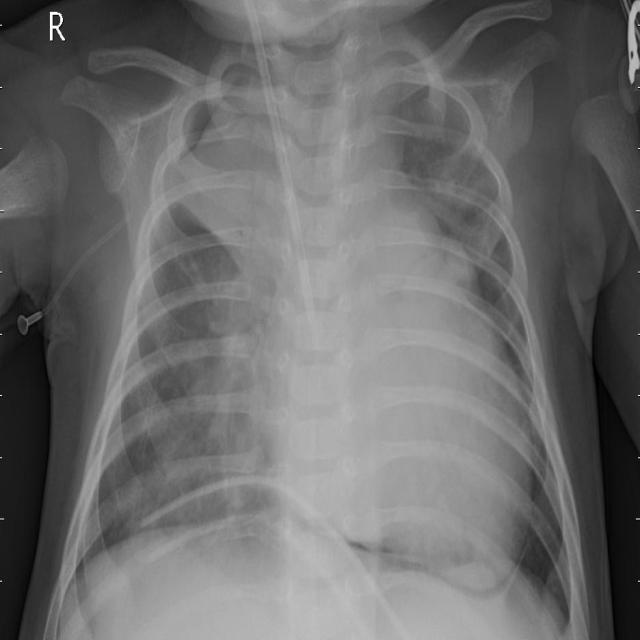

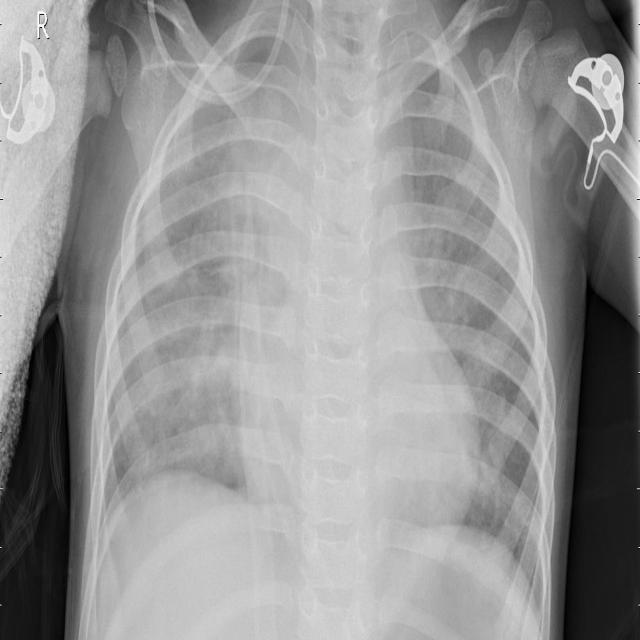

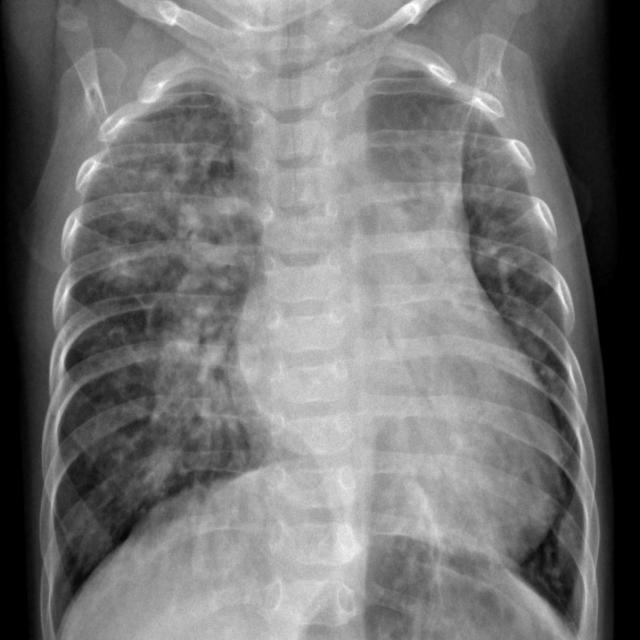

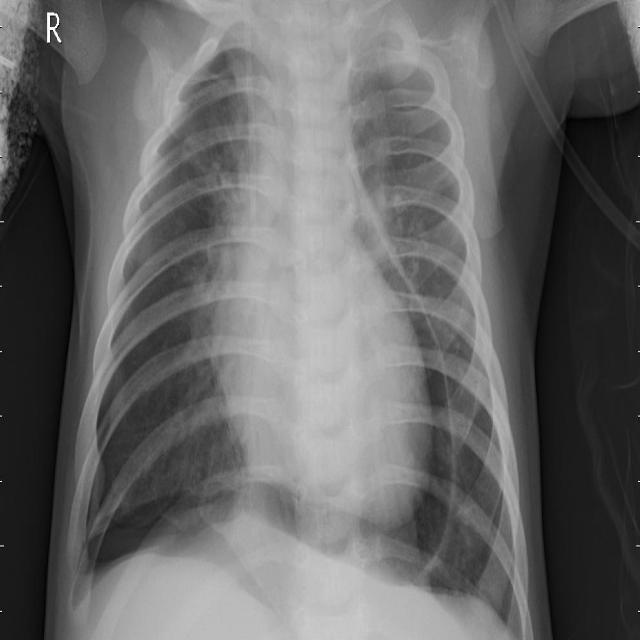

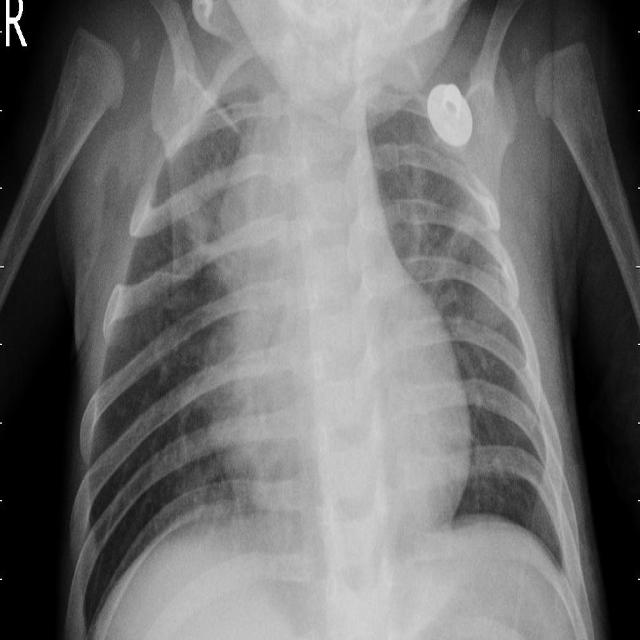

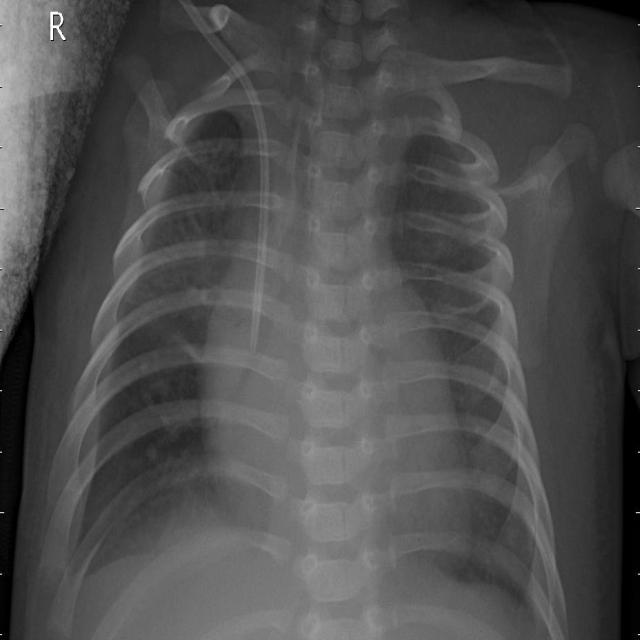

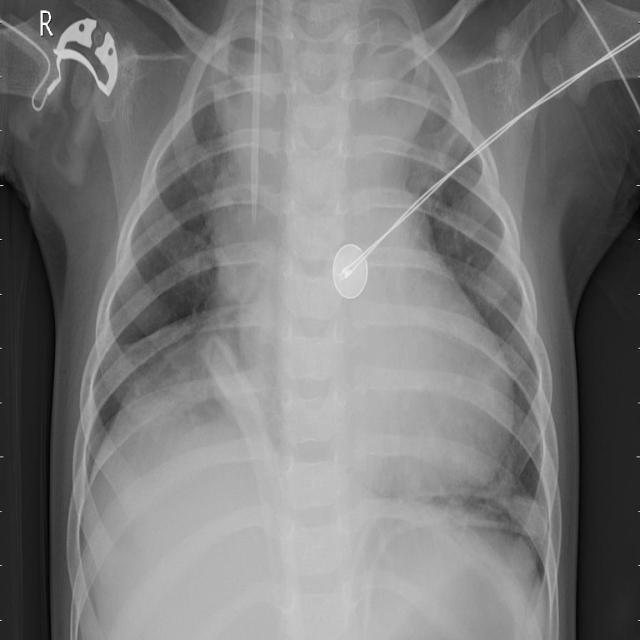

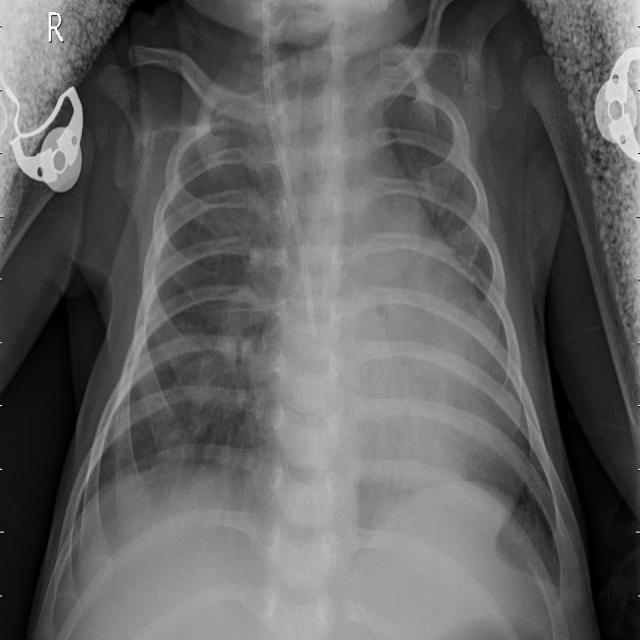

In [ ]:
# Vamos a visualizar algunas imagenes del dataset.
from IPython.display import display, Image
import glob

for image_path in glob.glob(f'{dataset.location}/test/bacteria/*.jpg')[:8]:
    display(Image(filename=image_path, width=600))
    print("\n")


### B. [MATPLOTLIB.IMAGE](https://matplotlib.org/stable/api/imag#e_api.html)

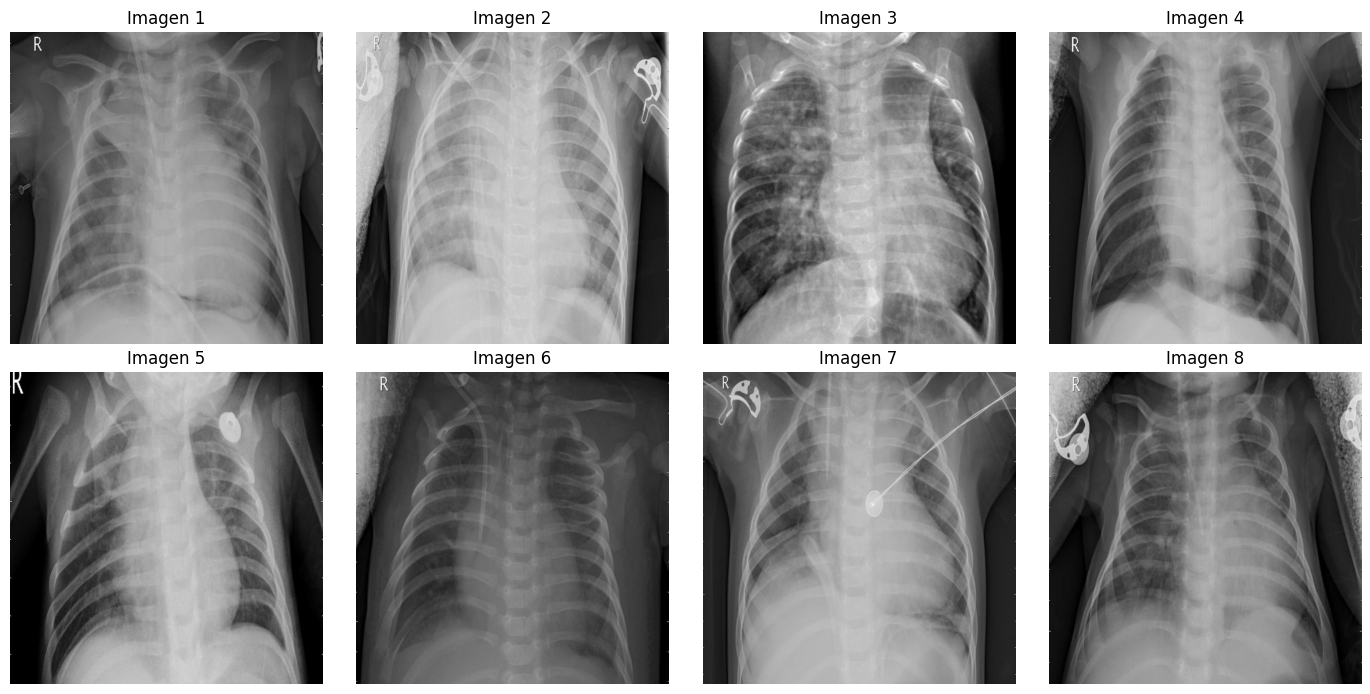

In [ ]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()


### C. [PIL/PILLOW](https://pillow.readthedocs.io/en/stable/)

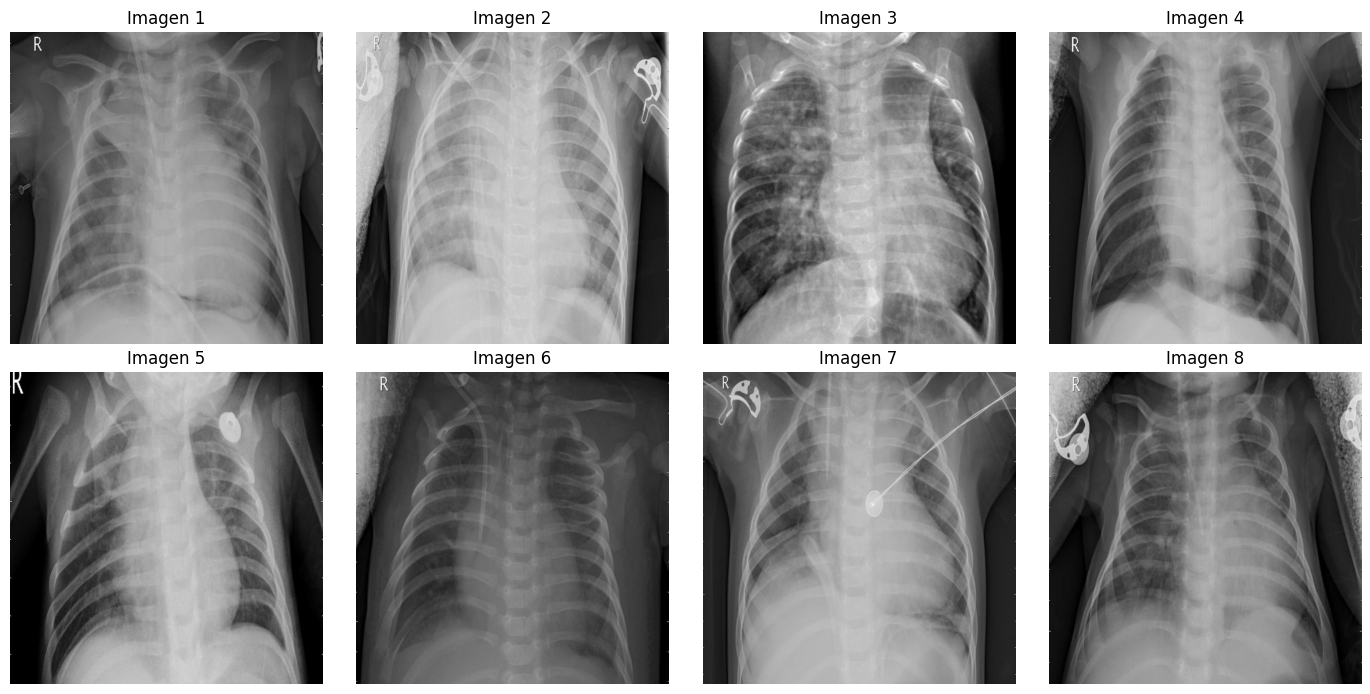

In [ ]:
from PIL import Image
import glob
import matplotlib.pyplot as plt


# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = Image.open(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()

### D. [OpenCV](https://opencv.org/)

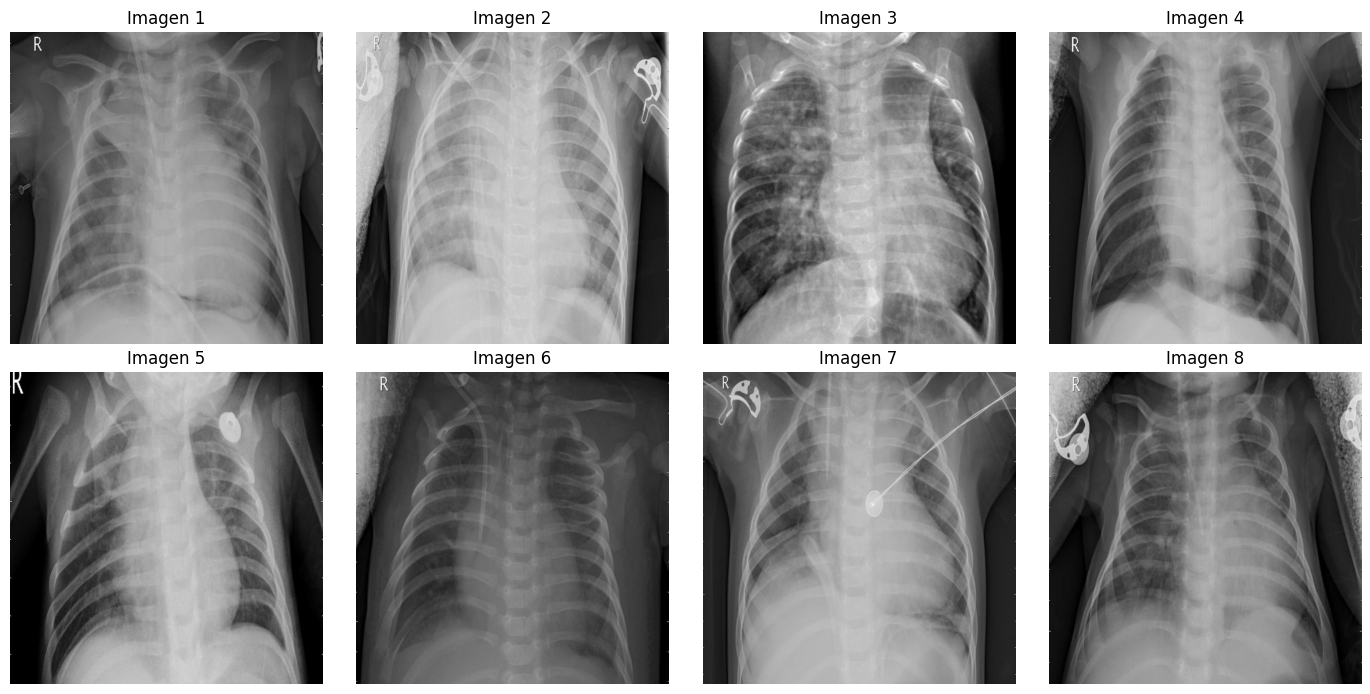

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt


# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()

### E. [SCIKIT-IMAGE](https://scikit-image.org/)

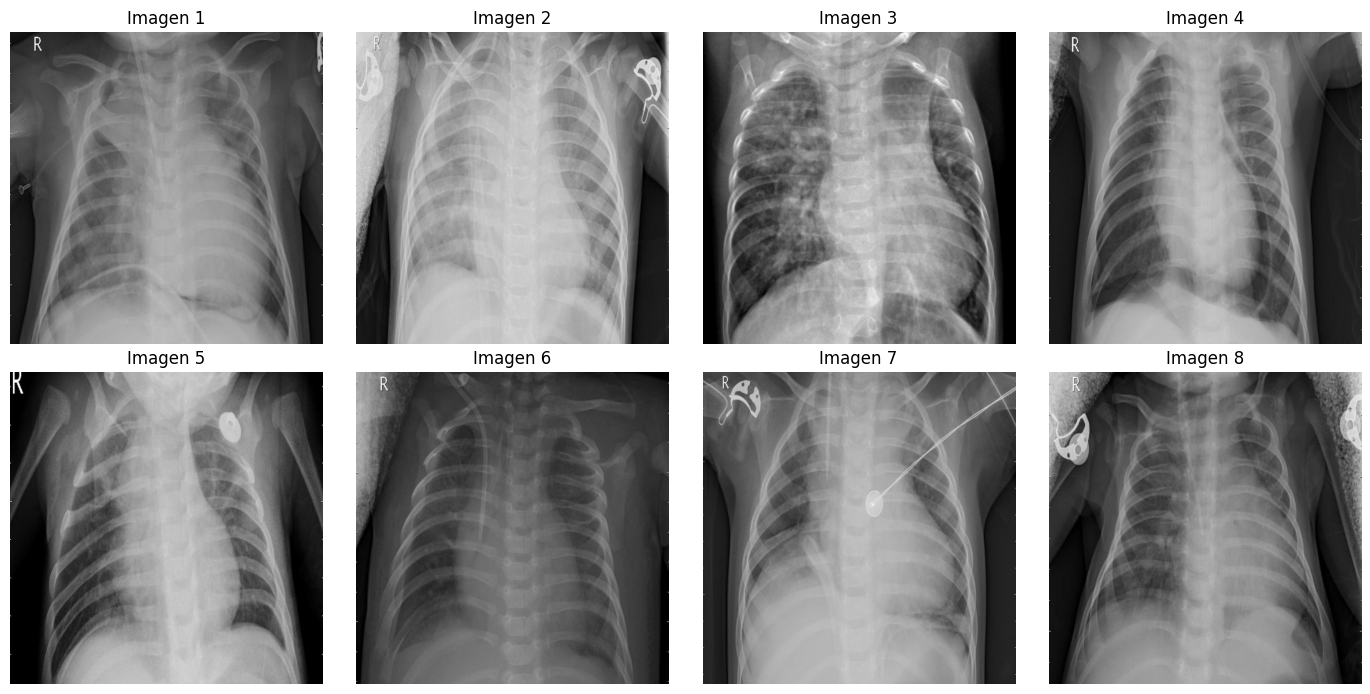

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import glob

# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = io.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()


# [TRAIN (ULTRALYTICS YOLOV8)](https://docs.ultralytics.com/modes/train/)

"YOLOv8" es una versión oficial de la serie YOLO (You Only Look Once) de modelos de detección de objetos. La serie YOLO es conocida por su evolución constante, y han ocurrido diversos desarrollos hasta la fecha.

La serie YOLO se destacó por su enfoque en la detección de objetos en tiempo real con una sola pasada de la red neuronal a través de la imagen, lo que lo hizo muy eficiente. Los modelos YOLO anteriores, como YOLOv3, YOLOv4 y YOLOv5, eran conocidos por su rendimiento y precisión en la detección de objetos en imágenes y videos.

Para obtener información actualizada sobre cualquier versión posterior de la serie YOLO, te recomiendo consultar las fuentes oficiales, como el repositorio de código abierto en [GitHub](https://github.com/ultralytics) y la [documentación asociada](https://docs.ultralytics.com/).

YOLOv8 es la versión más reciente de YOLO (You Only Look Once) desarrollada por Ultralytics. Como un modelo de última generación, líder en su clase (SOTA, por sus siglas en inglés), YOLOv8 se basa en el éxito de las versiones anteriores, introduciendo nuevas características y mejoras para un mejor rendimiento, flexibilidad y eficiencia. YOLOv8 admite una amplia gama de tareas de visión artificial, que incluyen detección, segmentación, estimación de pose, seguimiento y clasificación. Esta versatilidad permite a los usuarios aprovechar las capacidades de YOLOv8 en diversas aplicaciones y dominios. Esto significa que YOLOv8 es aplicable a una variedad de tareas en el campo de la inteligencia artificial, como la detección y seguimiento de objetos, segmentación de imágenes, estimación de poses, clasificación y más. Estas mejoras y características adicionales hacen de YOLOv8 un modelo de vanguardia en el campo de la visión por computadora.

Las características clave y las mejoras en YOLOv8, según la información proporcionada, incluyen:

- **Versatilidad**: YOLOv8 admite una amplia variedad de tareas de visión por computadora, como detección de objetos, segmentación, estimación de postura, seguimiento y clasificación. Esta versatilidad lo hace aplicable a una amplia gama de aplicaciones y dominios.

- **Rendimiento mejorado**: YOLOv8 probablemente incluye mejoras de rendimiento en comparación con sus predecesores, lo cual es un objetivo común en el desarrollo de nuevas versiones. El rendimiento mejorado puede implicar una mayor precisión, tiempos de inferencia más rápidos o ambas cosas.

- **Flexibilidad**: La flexibilidad de YOLOv8 es un aspecto esencial, ya que permite a los usuarios adaptar el modelo a diversas tareas y escenarios. La capacidad de manejar diferentes tareas de visión por computadora puede ser valiosa para aplicaciones prácticas.

- **Estado del arte**: Ser un modelo de última generación sugiere que YOLOv8 incorpora los avances más recientes en detección de objetos e investigación en visión por computadora.

- **Soporte para diversas aplicaciones**: Las capacidades de YOLOv8 en diferentes tareas de inteligencia artificial en visión abren posibilidades para aplicaciones en campos como vehículos autónomos, vigilancia, atención médica y más.

#### [Clasificación](https://docs.ultralytics.com/tasks/classify/)

La clasificación de imágenes es la tarea más simple de las tres y consiste en clasificar una imagen completa en una de un conjunto de clases predefinidas.

La salida de un clasificador de imágenes es una única etiqueta de clase y una puntuación de confianza. La clasificación de imágenes es útil cuando solo necesitas saber a qué clase pertenece una imagen y no necesitas conocer la ubicación exacta de los objetos de esa clase ni su forma precisa.

Los [modelos](https://github.com/ultralytics/ultralytics/tree/main/ultralytics/cfg/models) YOLOv8 para clasificación utilizan el sufijo `"-cls"`, es decir, "yolov8n-cls.pt" y están preentrenados en [ImageNet](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml).



In [ ]:
# Volver a HOME desde el directorio dataset
os.chdir(HOME)
print(os.getcwd())

# Empezar a entrenar. Si no existe ".pt" en el directorio actual se descargará.
model = YOLO('yolov8n-cls.pt') # nano-classification model.

classification_train = model.train(data=f'{dataset.location}', epochs=1, save=True) # imgsz=256,

/content


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/chest-xray-images-3, epochs=1, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

Lo que hace este proceso , es que yolov8 es entrenada (train) frente al subconjunto `train` y validada (Validating) frente a `test`. Cada vez que se entrena, obtenemos una subcarpeta con los resultados (train, train1, train2, etc) en la carpeta `runs`.Imaginemos, que después de varias pruebas hemos decidido que el mejor entrenamiento esta en train2.

Vemos también, que tenemos diferentes resultados para train2 y dos modelos de red guardados en weights, el mejor (`best.pt`) y el último (`last.pt`). El entrenamiento por último utiliza elmejor modelo de entrenamiemnto para un unaltima validación con `best.pt`. Vamos a ver que resultados nos proporciona train2.

`classify_train.save_dir` tiene el ultimo directorio donde se ha salvado los resultados del entrenamiento, pero a veces es mejor usar un entrenamiento previo, por eso en lugar de usar `classify_train.save-dir` vamos a utilizar una leve modificación que nos permita utilizar ''a mano'' cualquier resultado de entrenamiento.

## VISUALIZAR RESULTADOS ENTRENAMIENTO

In [ ]:
classify_train_save_dir= os.path.join(HOME,'runs/classify/train2')

print(os.listdir(classify_train_save_dir),'\n')

!ls -la {classify_train_save_dir}

['train_batch0.jpg', 'train_batch1.jpg', 'val_batch0_pred.jpg', 'results.png', 'args.yaml', 'train_batch2.jpg', 'confusion_matrix.png', 'weights', 'val_batch2_pred.jpg', 'results.csv', 'val_batch0_labels.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'events.out.tfevents.1698678308.f4615dfc246e.209.1', 'confusion_matrix_normalized.png'] 

total 1504
drwxr-xr-x 3 root root   4096 Oct 30 15:06 .
drwxr-xr-x 4 root root   4096 Oct 30 15:05 ..
-rw-r--r-- 1 root root   1426 Oct 30 15:05 args.yaml
-rw-r--r-- 1 root root 115094 Oct 30 15:06 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 106904 Oct 30 15:06 confusion_matrix.png
-rw-r--r-- 1 root root 163928 Oct 30 15:06 events.out.tfevents.1698678308.f4615dfc246e.209.1
-rw-r--r-- 1 root root    384 Oct 30 15:06 results.csv
-rw-r--r-- 1 root root  70873 Oct 30 15:06 results.png
-rw-r--r-- 1 root root 107417 Oct 30 15:05 train_batch0.jpg
-rw-r--r-- 1 root root 107132 Oct 30 15:05 train_batch1.jpg
-rw-r--r--

In [ ]:
!cat {classify_train_save_dir}/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                0.17415,                0.80513,                      1,                 0.3892,             0.00023753,             0.00023753,             0.00023753


In [ ]:
import pandas as pd

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(f'{classify_train_save_dir}/results.csv')
df.head(10)
# Mostrar los primeros 10 registros
print(df.head(10))

                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.17415                  0.80513   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                        1                   0.3892                 0.000238   

                    lr/pg1                   lr/pg2  
0                 0.000238                 0.000238  


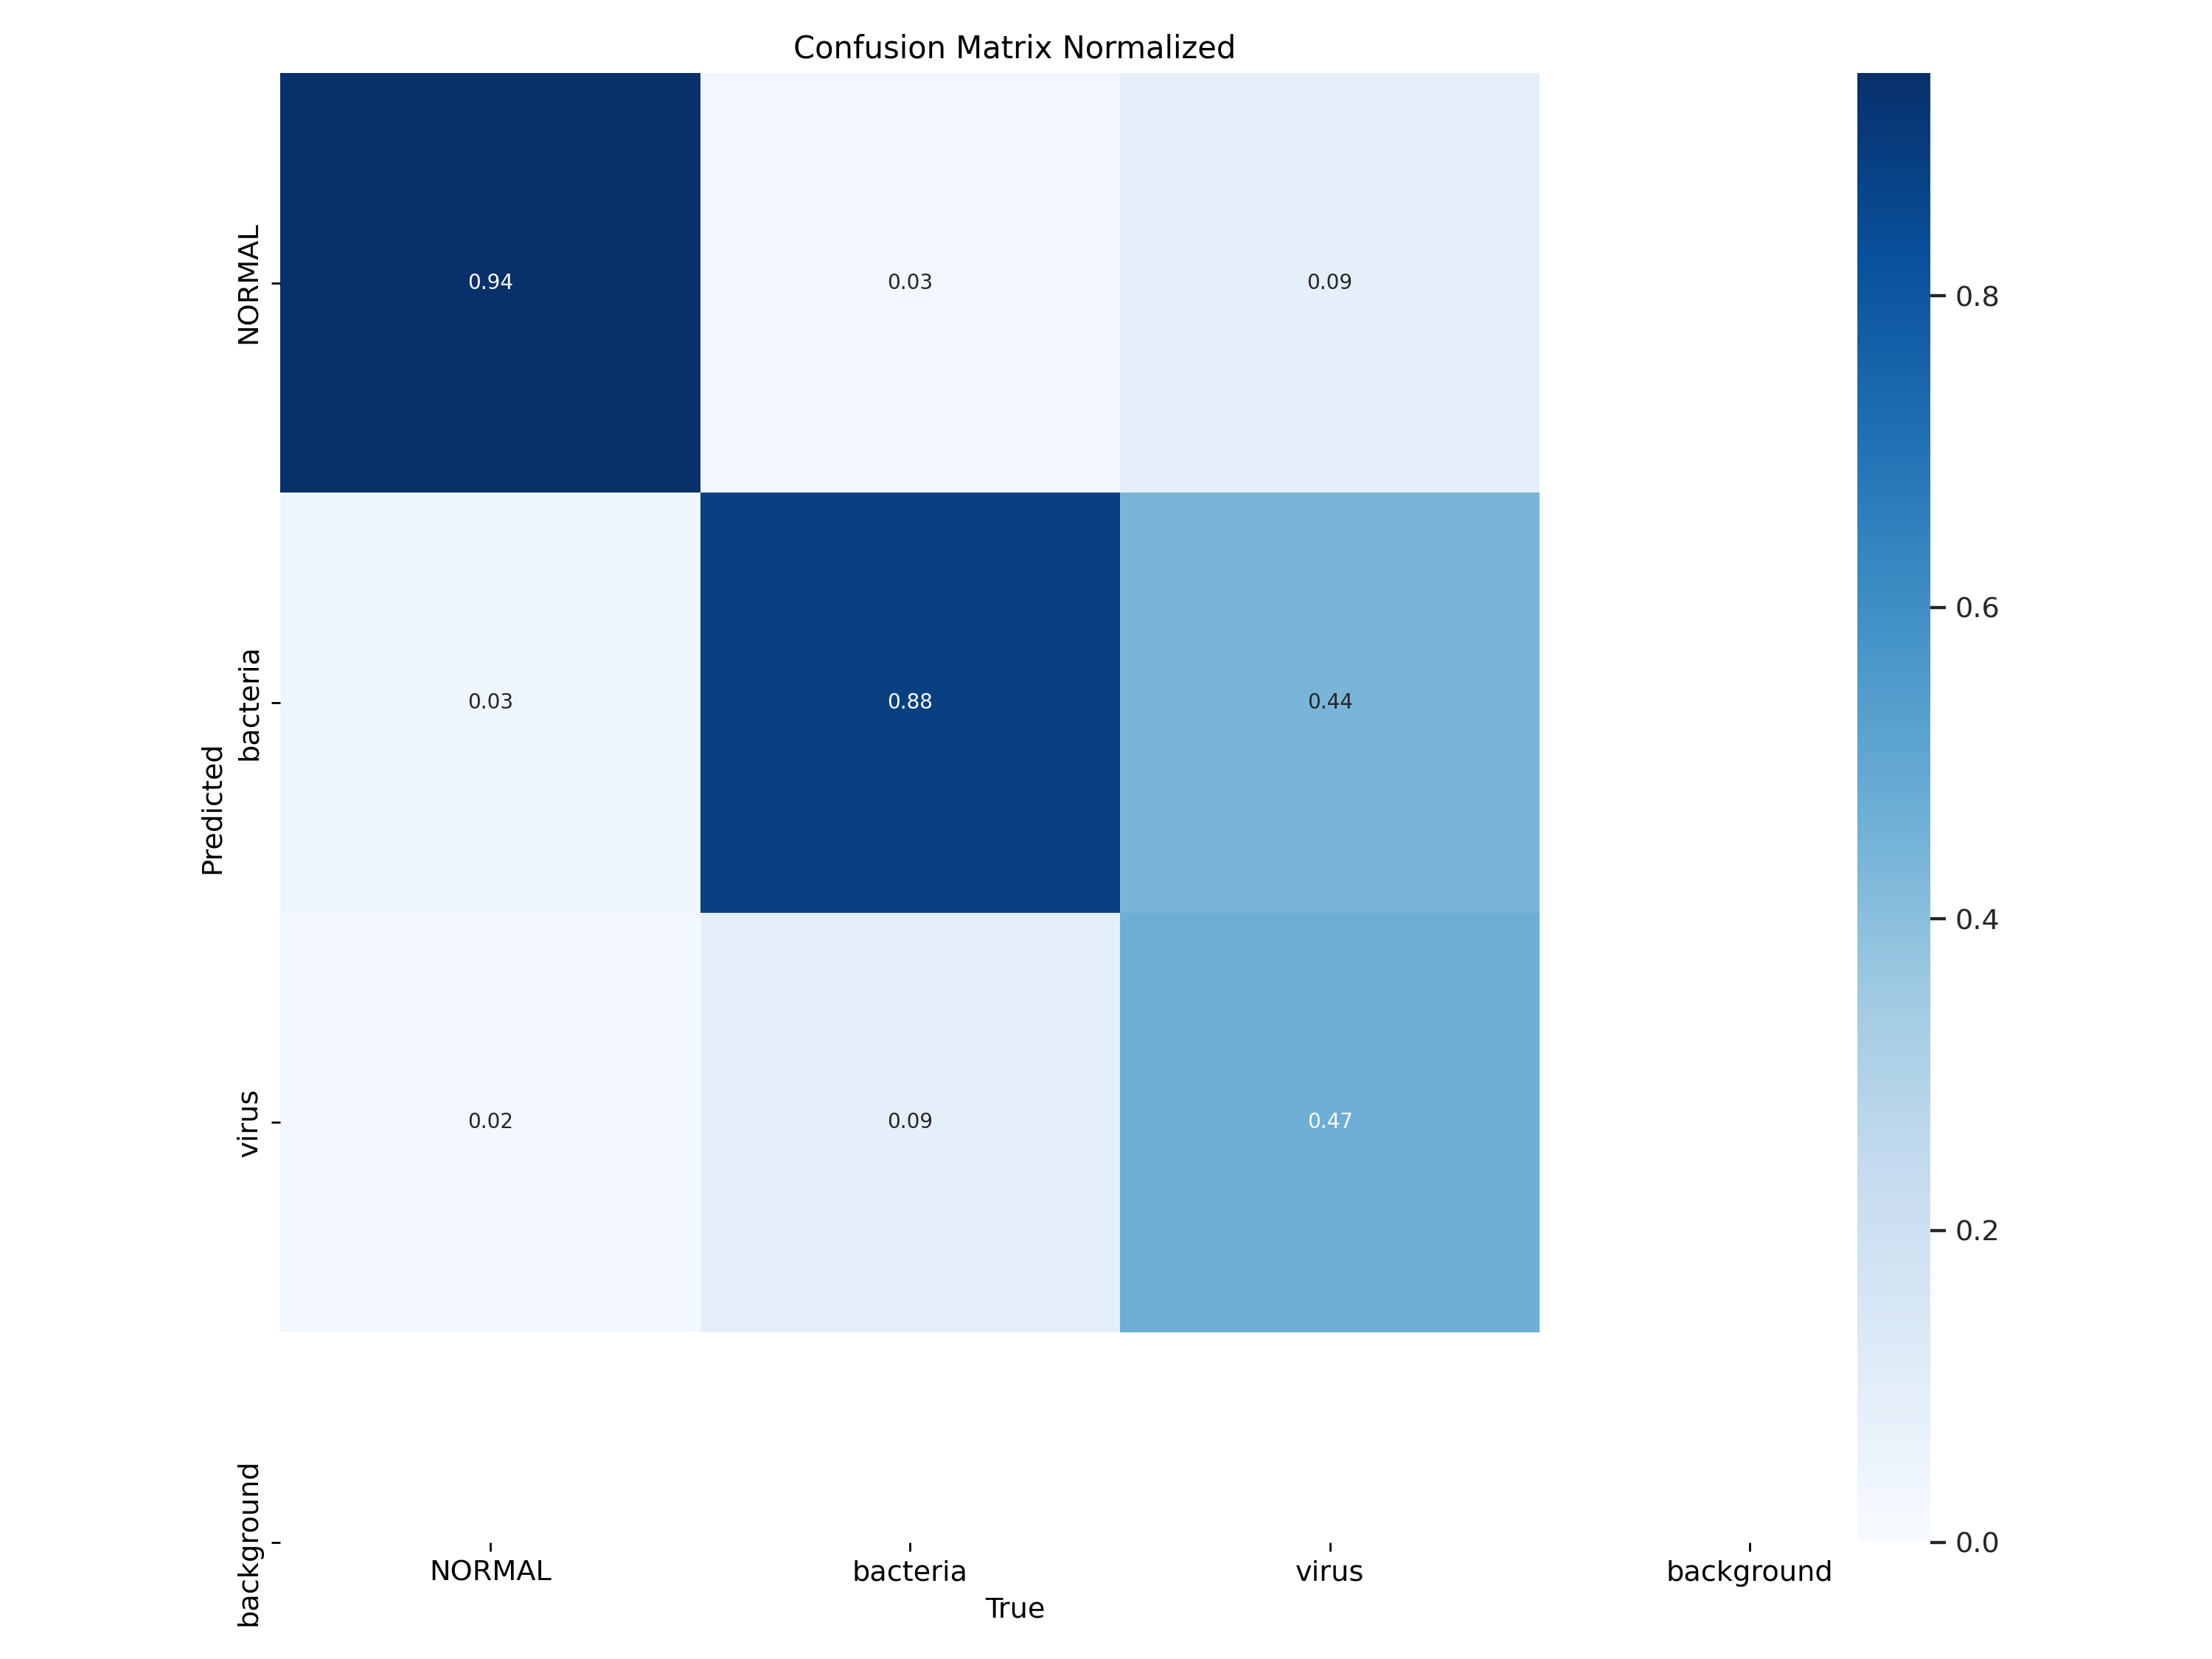

In [ ]:
from IPython.display import display, Image

Image(filename=f'{classify_train_save_dir}/confusion_matrix_normalized.png',width=600)

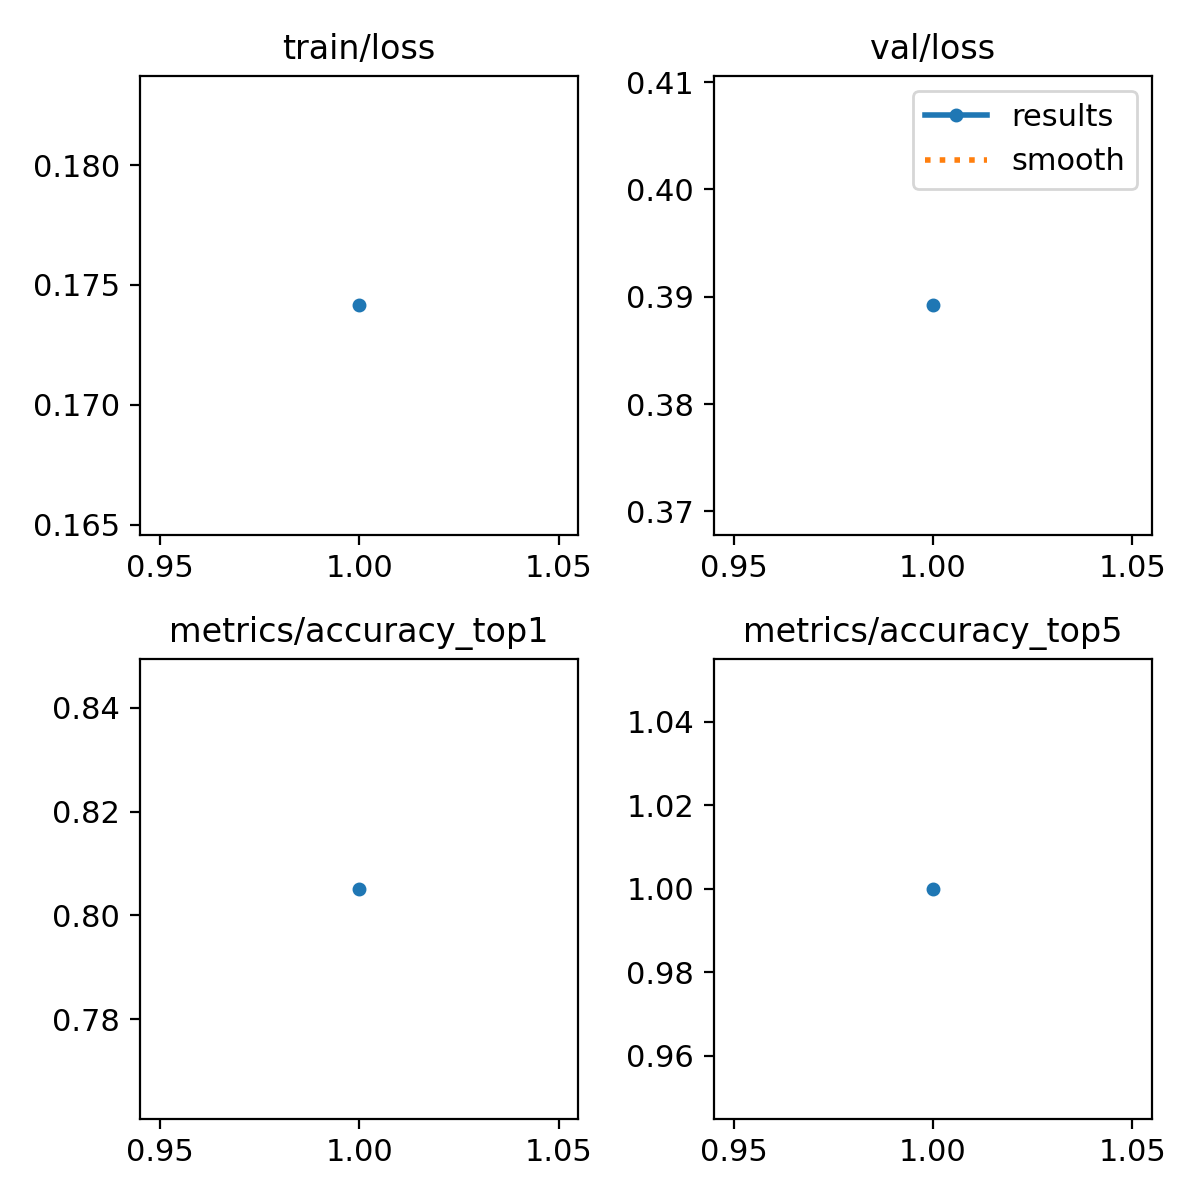

In [ ]:
Image(filename=f'{classify_train_save_dir}/results.png',width=600)

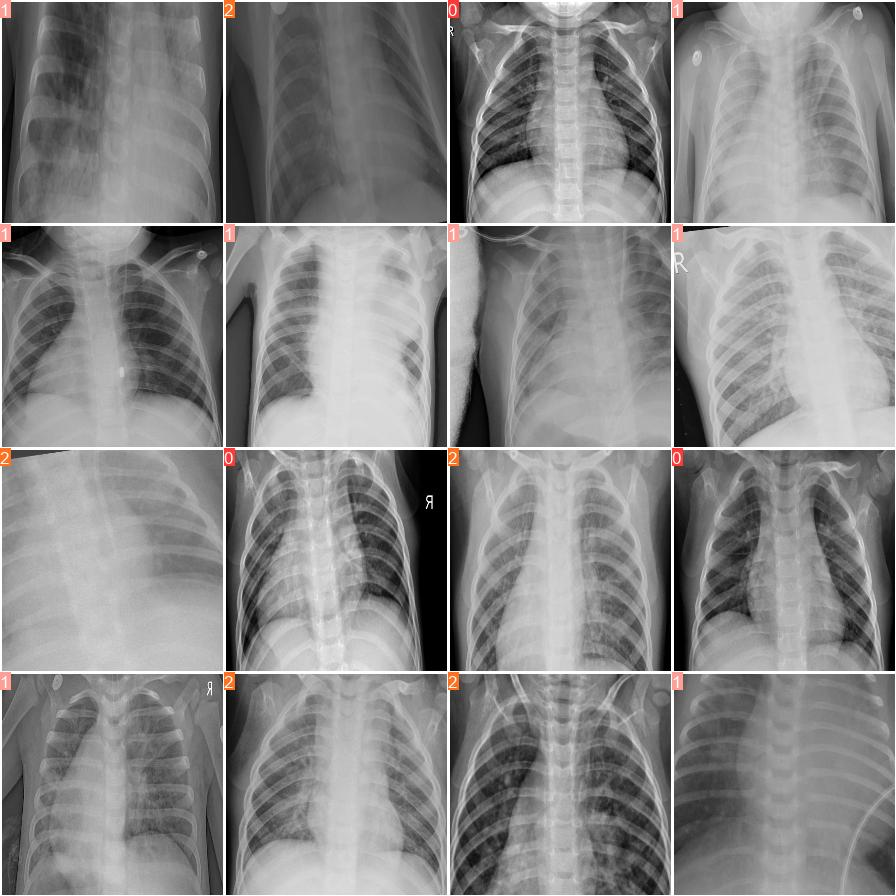

In [ ]:
Image(filename=f'{classify_train_save_dir}/train_batch1.jpg',width=600)

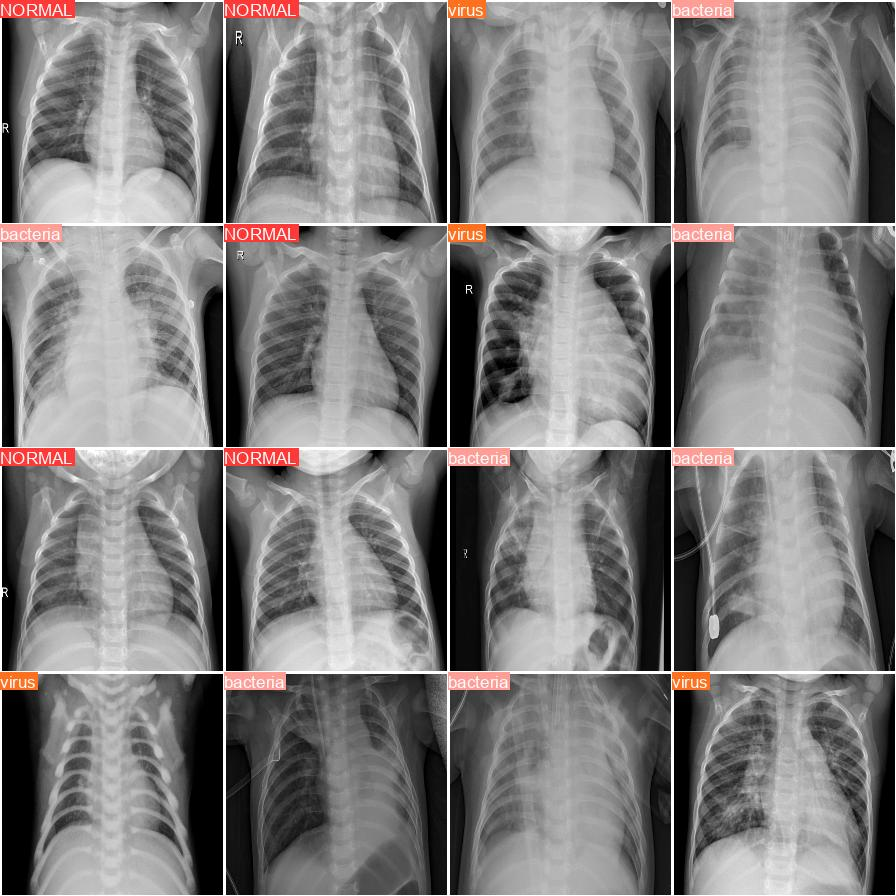

In [ ]:
Image(filename=f'{classify_train_save_dir}/val_batch1_labels.jpg',width=600)

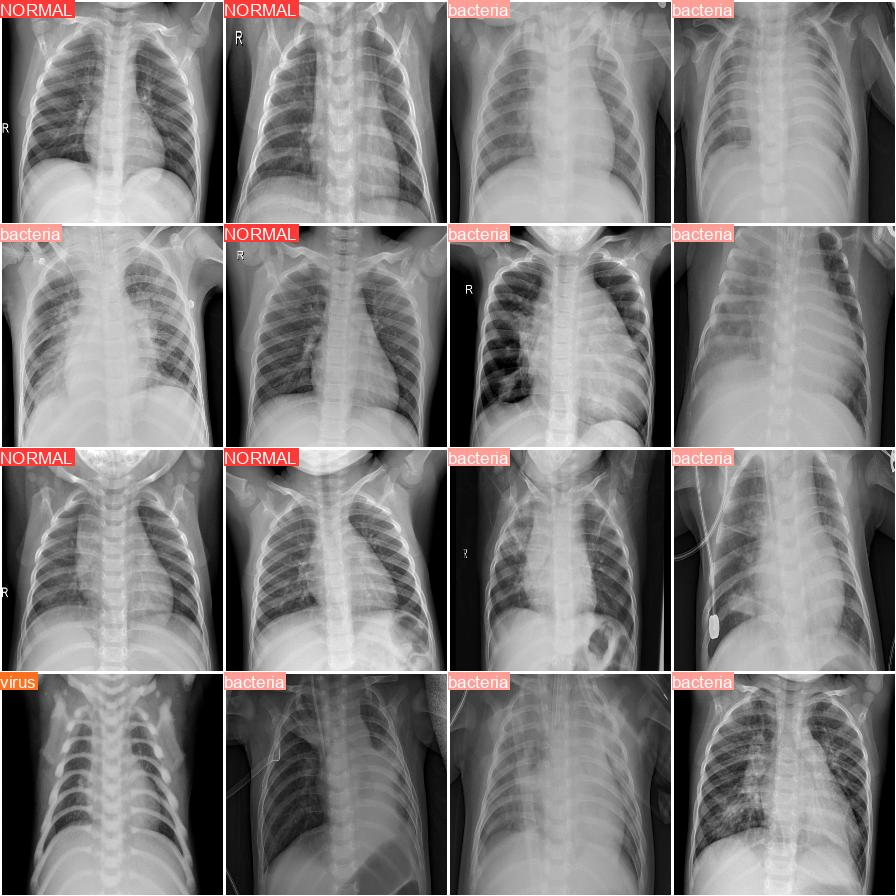

In [ ]:
Image(filename=f'{classify_train_save_dir}/val_batch1_pred.jpg',width=600)

In [ ]:
""" # Podemos, en lugar de entrenar en local como hemos hecho, utilizar el modelo ya
# entrenado por roboflow e inferir en local.

from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace().project("license-plate-recognition-rxg4e")
model = project.version(4).model.download('roboflow.pt')
 """

' # Podemos, en lugar de entrenar en local como hemos hecho, utilizar el modelo ya\n# entrenado y subido a roboflow e inferir en local. \n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")\nproject = rf.workspace().project("license-plate-recognition-rxg4e")\nmodel = project.version(4).model.download(\'roboflow.pt\')\n '

In [ ]:

# infer on a local image
#print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())


# Validación

Hemos utilizado los subconjuntos train y test para entrenar a Yolov8. Se va a tomar los pesos mejor obtenidos en el entrenamiento (train2) y los vamos a usar para evaluar el modelo usanjdo el modo `val` (a diferencia del modo `classify, train o detect`). El modo `val` utiliza un conjunto de datos `val` que no ha sido usado como conjunto de datos durante el entrenamiento (utiliza train y test). Los resultados entregados por la validación son las verdaderas metricas del modelo que deberían preocuparnos.

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{classify_train_save_dir}/weights/best.pt') #load my custom model

classify_val = model.val(data=f'{dataset.location}', save=True) #imgsz=256

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/chest-xray-images-3/train... found 8140 images in 3 classes ✅ 
val: /content/datasets/chest-xray-images-3/val... found 1170 images in 3 classes ✅ 
test: /content/datasets/chest-xray-images-3/test... found 584 images in 3 classes ✅ 
val: Scanning /content/datasets/chest-xray-images-3/val... 1170 images, 0 corrupt: 100%|██████████| 1170/1170 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 74/74 [00:06<00:00, 10.72it/s]
                   all      0.805          1
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
#classify_val_save_dir = classify_val.save_dir
classify_val_save_dir= 'runs/classify/val'
!ls -la {classify_val_save_dir}

total 960
drwxr-xr-x 2 root root   4096 Oct 30 15:07 .
drwxr-xr-x 5 root root   4096 Oct 30 15:07 ..
-rw-r--r-- 1 root root 115034 Oct 30 15:07 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 107812 Oct 30 15:07 confusion_matrix.png
-rw-r--r-- 1 root root 119866 Oct 30 15:07 val_batch0_labels.jpg
-rw-r--r-- 1 root root 119854 Oct 30 15:07 val_batch0_pred.jpg
-rw-r--r-- 1 root root 115424 Oct 30 15:07 val_batch1_labels.jpg
-rw-r--r-- 1 root root 115392 Oct 30 15:07 val_batch1_pred.jpg
-rw-r--r-- 1 root root 129838 Oct 30 15:07 val_batch2_labels.jpg
-rw-r--r-- 1 root root 130100 Oct 30 15:07 val_batch2_pred.jpg


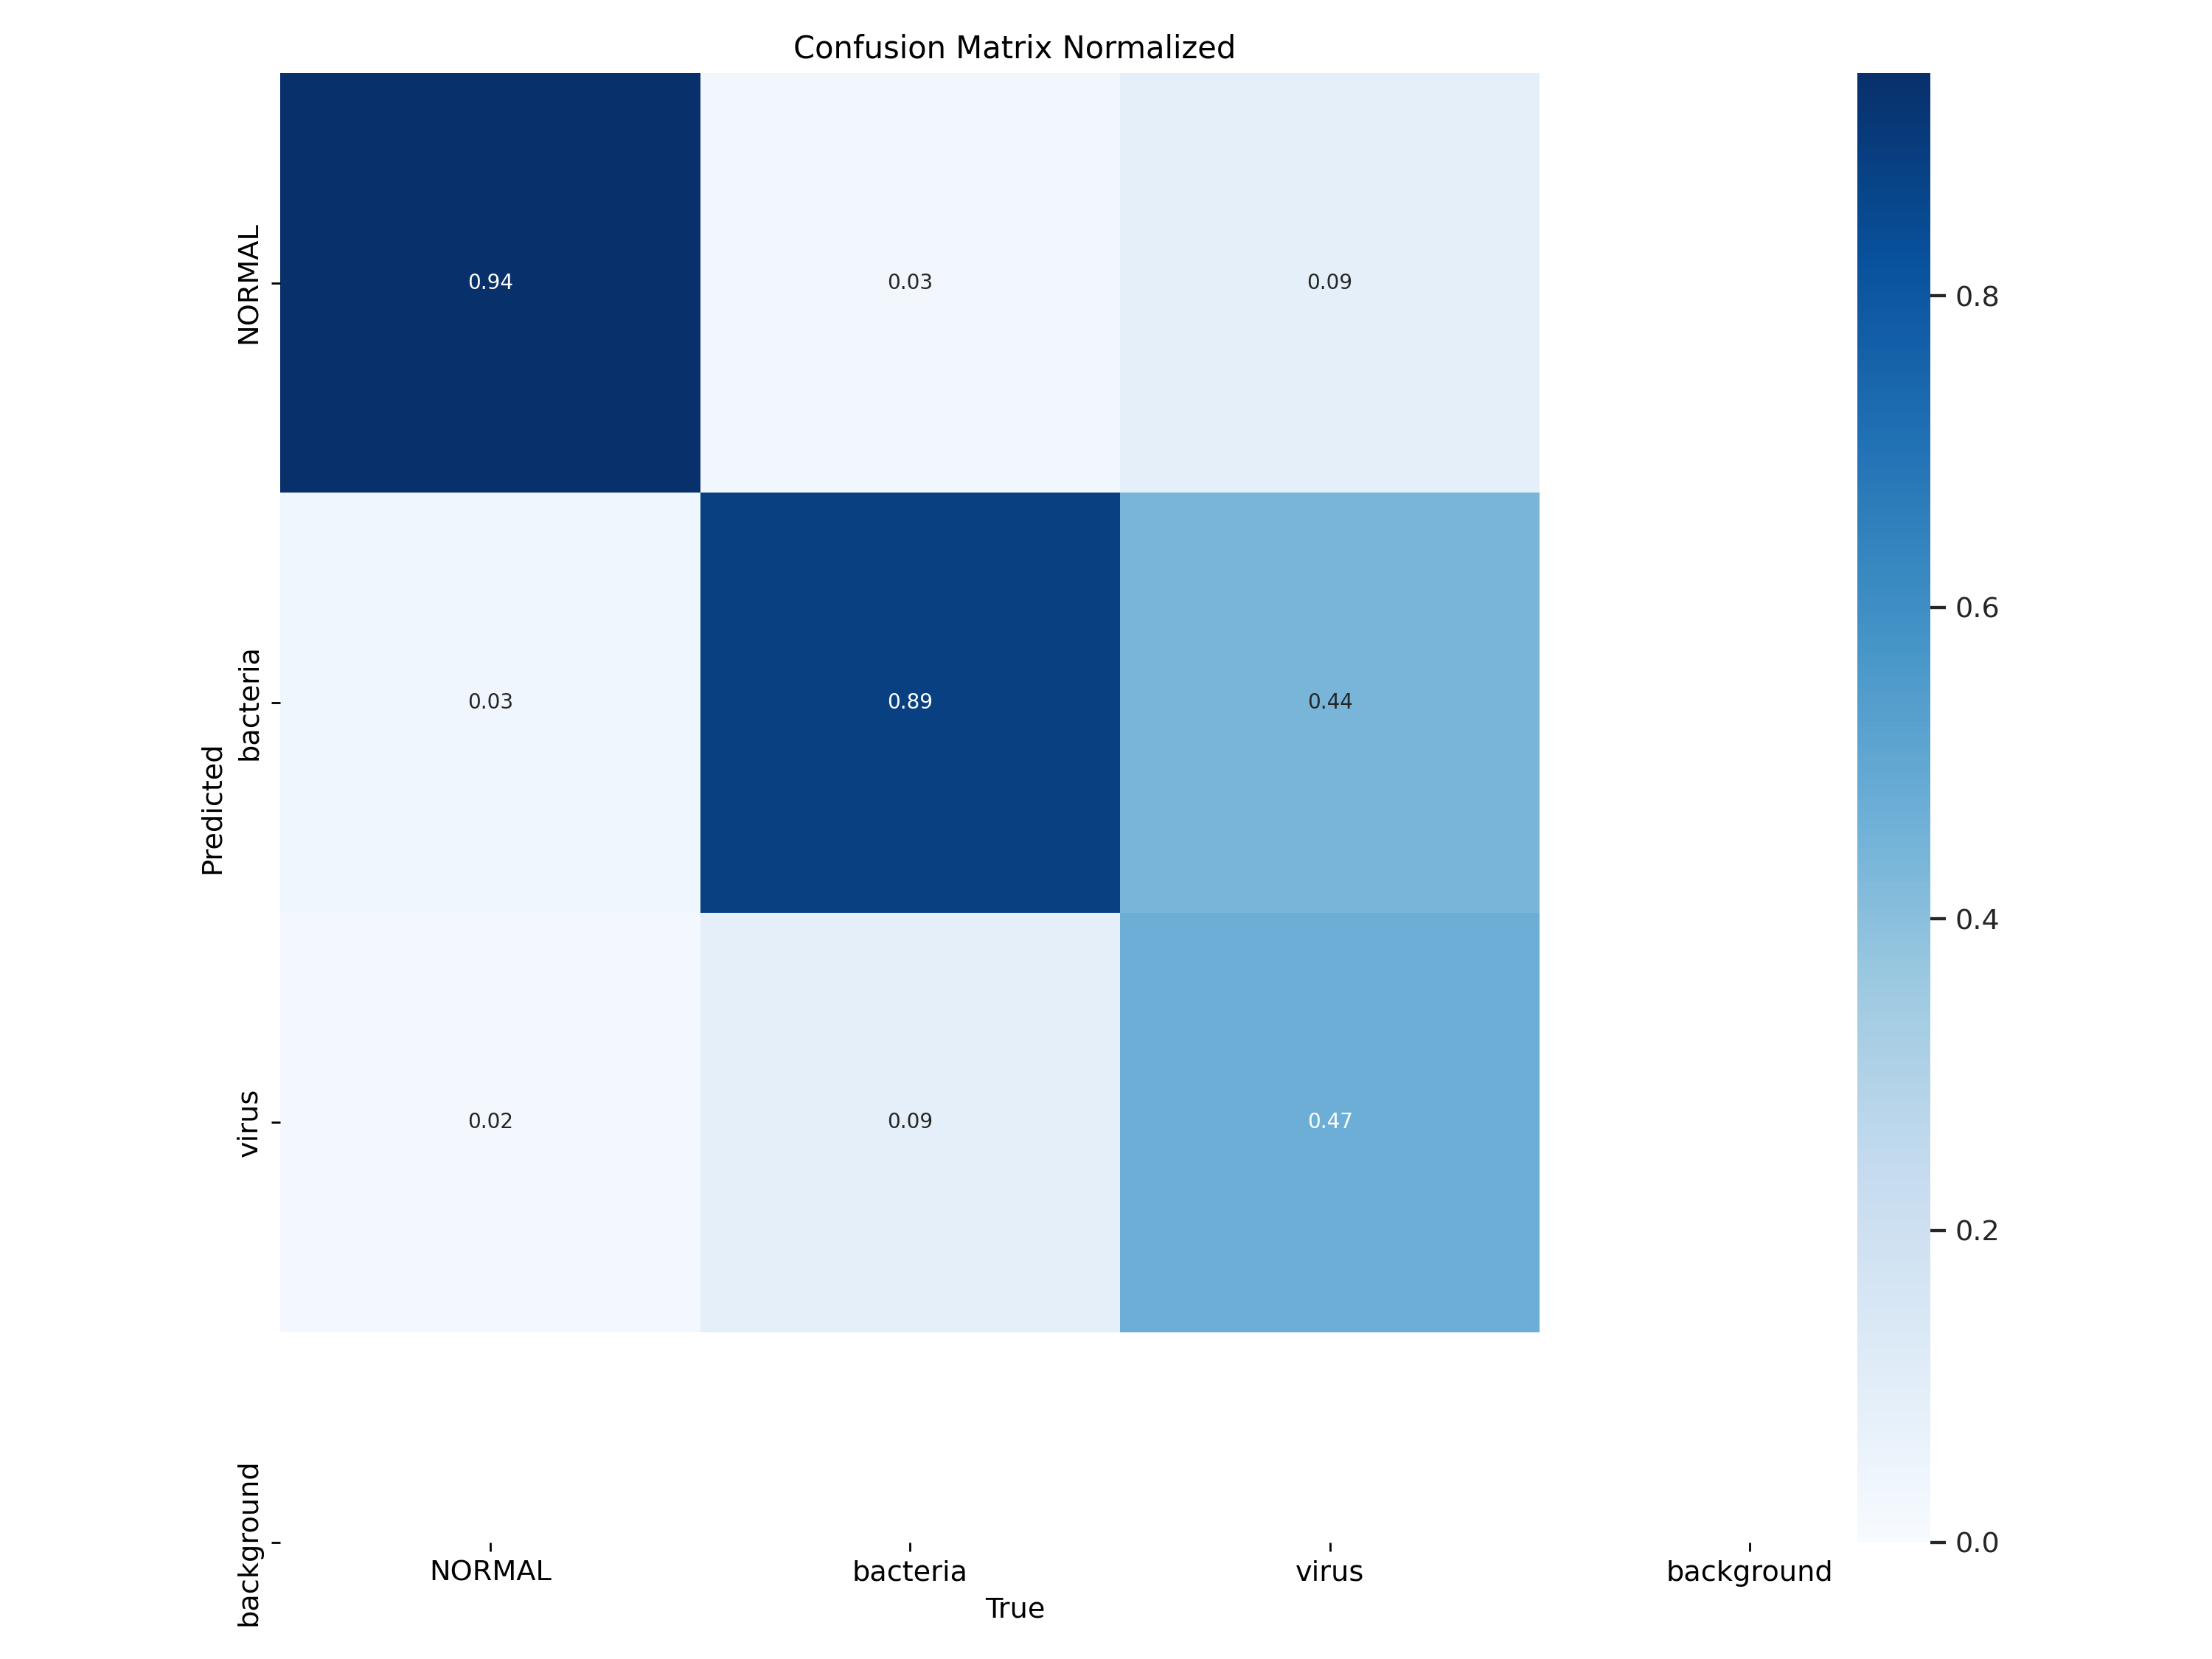

In [ ]:
Image(filename=f'{classify_val_save_dir}/confusion_matrix_normalized.png',width=600)

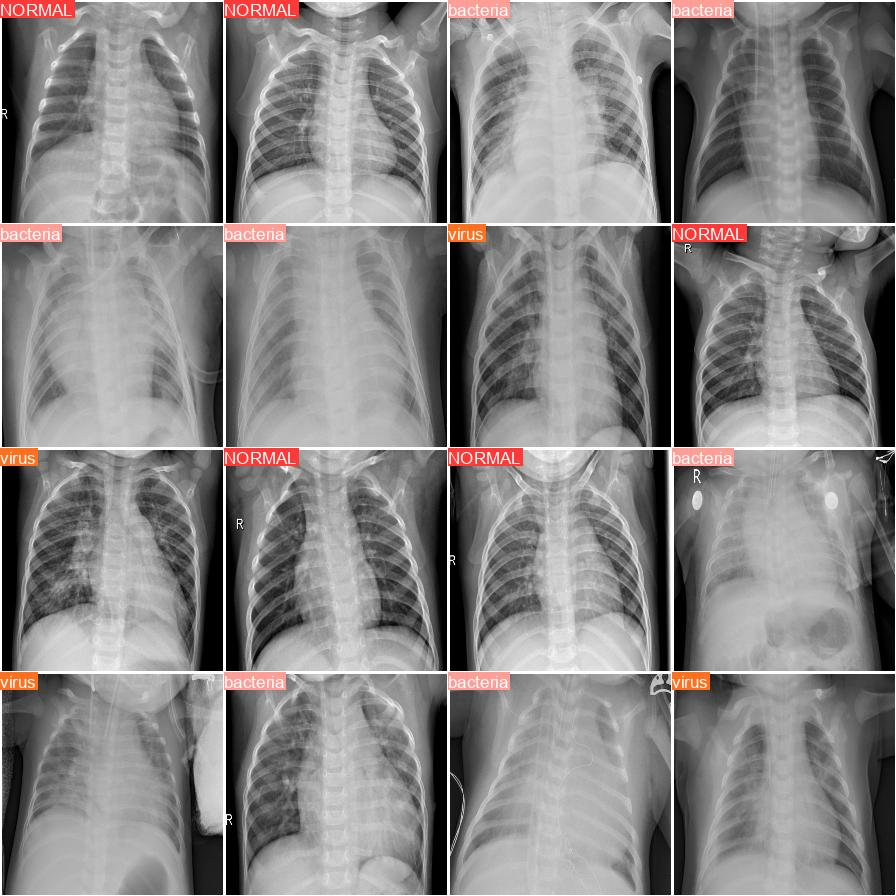

In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_labels.jpg',width=600)

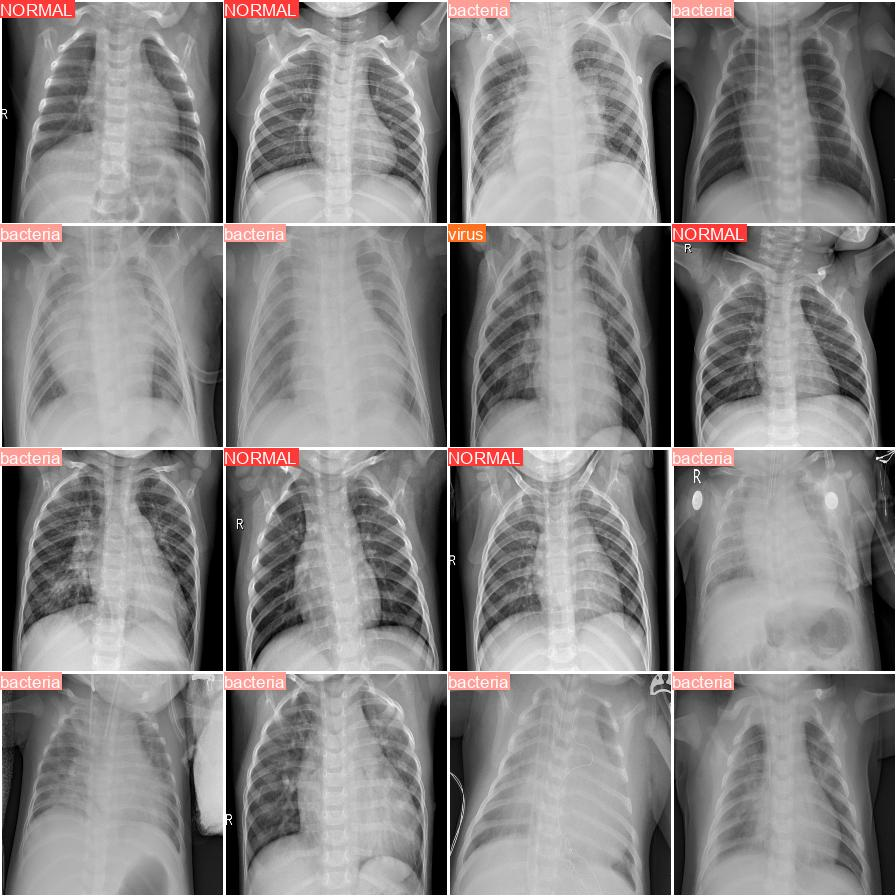

In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_pred.jpg',width=600)

[Imprimiendo desde Colab](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-print-colab.ipynb#scrollTo=7a810845-9125-48d3-a819-b1cdb1e15399)

Se necesita guardar una copia en google drive `archivo -->guardar una copia en drive`

In [ ]:
!apt-get update
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Chest_Xray_Classification_Train.ipynb' --to pdf
#!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Chest_Xray_Classification_Train.ipynb' --output-dir '/content' --to pdf

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is a